## Estadistica Aplicada

Tarea 5

Bárbara Govea Serna 1902869

Grupo 42

## Libreria y base de datos

In [1]:
# Librerias Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [62]:
# Librerias Especializadas
from lifelines import ExponentialFitter,WeibullFitter,LogNormalFitter,KaplanMeierFitter
from lifelines.statistics import logrank_test

In [3]:
quiebra = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [4]:
quiebra

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1
...,...,...,...
95,12,0,1
96,22,0,1
97,30,0,0
98,10,0,0


La base de datos muestra los años que tarda en quebrar una empresa, desde que se crea hasta que quiebra, guardados en la variable tiempo 

La variable quebrar toma valores de 1 si quebro, y 0 si esta censurada

La variable mujer toma valores de 0 si el fundador es hombre y 1 si es mujer


## 3. Con la base de datos quiebra...

### a. Ajuste un modelo de supervivencia exponencial

In [5]:
# Calculando la exponencial con esta funcion, fit es para estimar le debmos dar el tiempo de supervivencia, y el indicador de censura
exponencial = ExponentialFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

### b. Grafique la función de riesgo exponencial

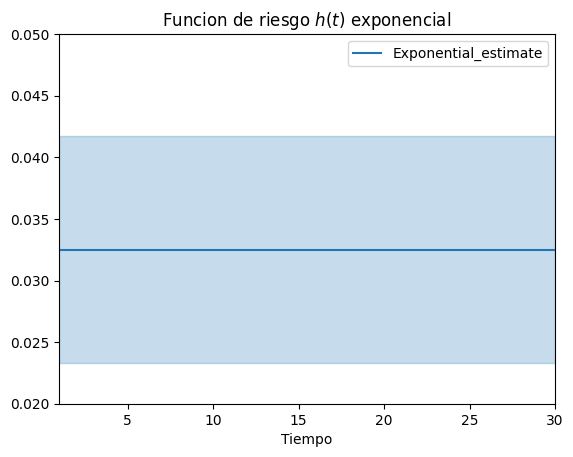

In [45]:
# Graficar la funcion de riesgo exponencial
exponencial.plot_hazard()
plt.title('Funcion de riesgo $h(t)$ exponencial')
plt.xlim(1,30)
plt.ylim(.02,.05)
plt.xlabel('Tiempo')
plt.show()

### c. ¿Cuál es el riesgo de que una empresa quiebre según la función exponencial?

In [9]:
exponencial.hazard_
# El riesgo es constante 

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


El riesgo de que una empresa quiebre es constante, de 3.25% 


## 4. Utilizando la misma base de datos...

### a. Ajuste un modelo weibull de supervivencia

In [11]:
# Calculando la weibull con esta funcion, fit es para estimar le debmos dar el tiempo de supervivencia, y el indicador de censura
mweibull = WeibullFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

### b. Grafique la función de riesgo

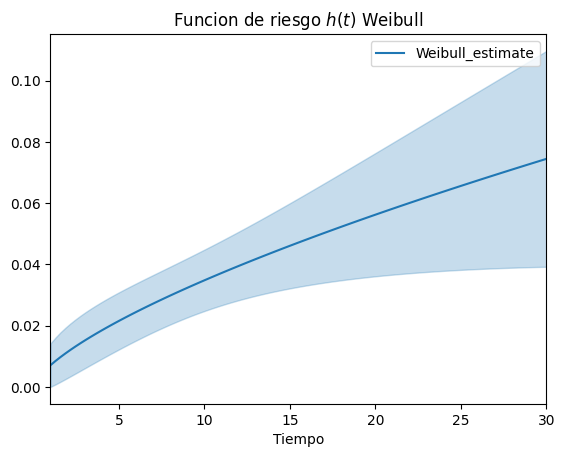

In [42]:
mweibull.plot_hazard()
plt.title('Funcion de riesgo $h(t)$ Weibull')
plt.xlim(1,30)
plt.xlabel('Tiempo')
plt.show()

### c. ¿Qué forma tiene la función de riesgo? y ¿Qué significa?

In [14]:
# Parametro gamma
mweibull.rho_

1.6927874452647882

En la gráfica de nuestra función de riesgo notamos que el riesgo es creciente. 

De igual manera, como  nuestro valor de gamma es mayor a 1 entonces existe un riesgo creciente. 
Conforme avanza el tiempo, el riesgo de quiebra es mayor. 
Entre mayor sea gamma, la relación con el tiempo es mayor.

## 5. Utilizando la misma base de datos

### a. Ajuste un modelo Log-Normal de supervivencia

In [15]:
# Calculando la lognormal con esta funcion, fit es para estimar le debmos dar el tiempo de supervivencia, y el indicador de censura
llognormal = LogNormalFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

### b. Grafique la función de riesgo

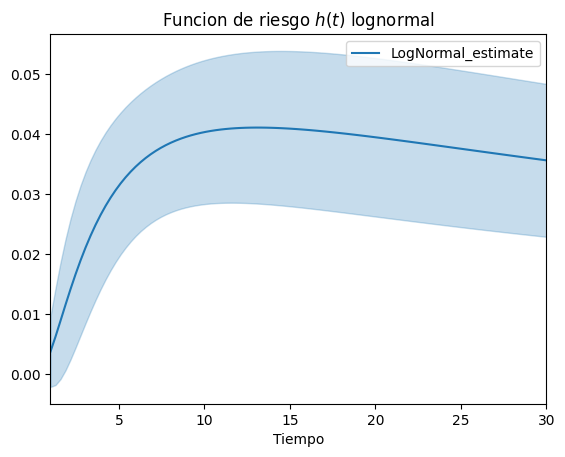

In [41]:
llognormal.plot_hazard()
plt.title('Funcion de riesgo $h(t)$ lognormal')
plt.xlim(1,30)
plt.xlabel('Tiempo')
plt.show()

### c. ¿En qué periodo el riesgo de quebrar es creciente y en cual decreciente?

Analizando la gráfica, vemos que el riesgo es creciente desde el tiempo 1 hasta el tiempo 10 aproximadamente, donde se observa que empieza a decrecer a partir de ese periodo

# 6. Utilizando el estimador de Kaplan-Meier...

### a. Estimar la función de superviviencia, la mediana de tiempo de supervivencia y diga que significa

In [23]:
# Estimador Kaplan Meier de la función de supervivencia, primero el tiempo después la censura
km_quiebra = KaplanMeierFitter().fit(quiebra['tiempo'], quiebra['quebrar'])
km_quiebra.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.990000
2.0,0.959694
3.0,0.928400
4.0,0.928400
5.0,0.917477
7.0,0.873261
8.0,0.829046
9.0,0.829046


In [24]:
km_quiebra.median_survival_time_

23.0

La mediana del tiempo de supervivencia es 23 años, significa que la mitad de las empresas quiebra antes de los 23 años, por consiguiente la otra mitad dura más de 23 años.

### b. Estimar la fn de supervivencia por Kaplan Meier para hombres y mujeres, realizar la gráfica. Diga si las empresas administradas por hombres/mujeres quiebran mas rápido. Etiquetar cada línea y agregar todos los elementos en la gráfica

In [56]:
# Separamos la base de datos
hombres = quiebra.query('mujer == 0')
mujeres = quiebra.query('mujer == 1')

# Estimar la fn de supervivencia por KM
km_hombres = KaplanMeierFitter().fit(hombres['tiempo'], hombres['quebrar'])
km_mujeres = KaplanMeierFitter().fit(mujeres['tiempo'], mujeres['quebrar'])

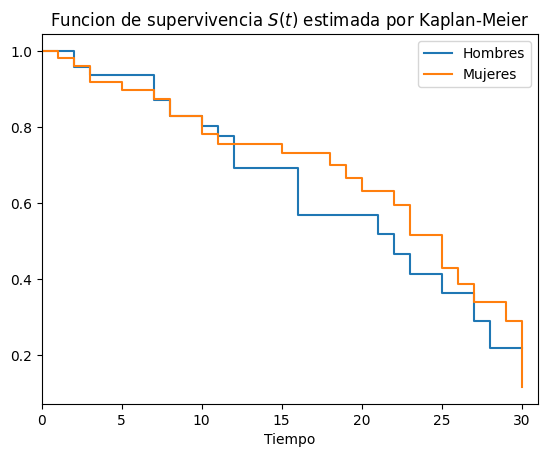

In [61]:
# Graficando la fn de supervivencia
km_hombres.plot_survival_function(ci_show=False,label='Hombres')
km_mujeres.plot_survival_function(ci_show=False,label='Mujeres')
plt.title('Funcion de supervivencia $S(t)$ estimada por Kaplan-Meier')
plt.xlim(0,31)
plt.xlabel('Tiempo')
plt.show()


Analizando la gráfica, notese que en el tiempo 30, termina la función de supervivencia representada para los hombres por lo que podriamos decir que las empresas administradas por hombres quiebran más rápido. 
En las intersecciones, las funciones de supervivencia son iguales, tanto para hombres como para mujeres

### c. Refutar o confirmar con evidencia estadistica la afirmación del profesor, que las empresas fundadas por hombres quiebran más rápido

In [72]:
# Realizaremos un log rank test, donde se contrasta la hipotesis nula de que ambas funciones de supervivencia son iguales con la hipotesis de que son diferentes
Lrt = logrank_test(hombres['tiempo'],mujeres['tiempo'],hombres['quebrar'],mujeres['quebrar'])
Lrt.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75>

Notese que nuestro p value es de .59, mayor a .05 (nivel de significancia) por lo no hay evidencias para rechazar la hipotesis nula.

Es decir, refutamos la idea de que las empresas administradas por los hombres quiebren más rapido, ya que no podemos concluir que existe una diferencia significativa entre ambas.